## Predicting Heart Disease using Machine Learning
We're going to take the following approach

0. Problem Definition
1. Data
2. Evaluation
3. Features
4. Modelling
5. Experimentation

## 0.Problem Definition
* Given clinical parameters about a patient, can we predict wheather or not they have heart disease

## 1.Data
* The original data came from the Cleveland Data from the UCI machine learning repository, there is alos a version available on kaggle.

## 2.Evaluation
* If we reach more than 90% accuracy at prediction, we'll pursue the project

## 3.Features

> Data dictionary:

* id (Unique id for each patient)
* age (Age of the patient in years)
* origin (place of study)
* sex (Male/Female)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* num: the predicted attribute

In [1]:
#Import all the tools needed

#Exploratory data analysis and data plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import RocCurveDisplay

In [2]:
#Load data
df=pd.read_csv("heart.csv")
df.shape

(1025, 14)

In [3]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Data Exploration (exploratory data analysis or EDA)
* The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* No missing values in the dataset

In [5]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

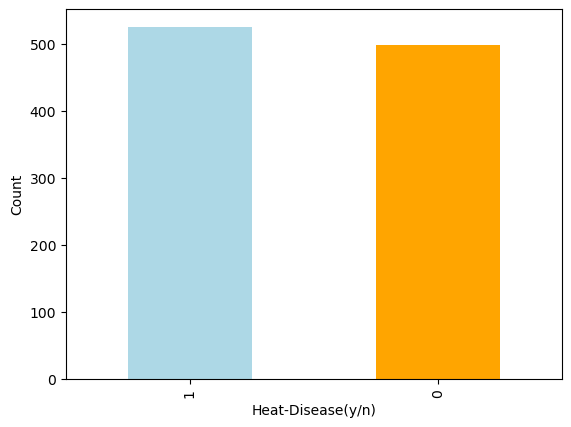

In [6]:
df["target"].value_counts().plot(kind="bar",color=["lightblue","orange"])
plt.xlabel("Heat-Disease(y/n)")
plt.ylabel("Count")
plt.show()

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
#Heart disease frequency according to gender
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,86,413
1,226,300


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

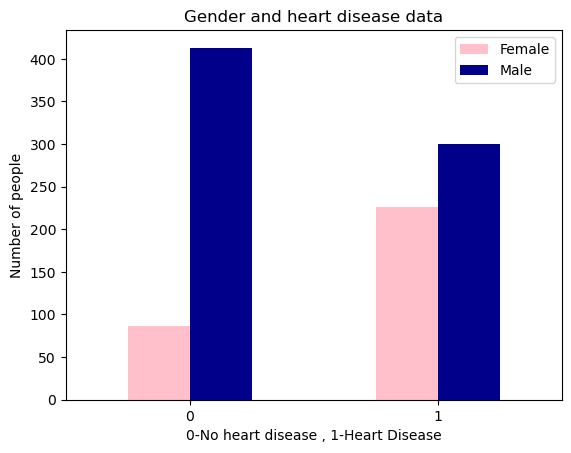

In [10]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=["pink","darkblue"])
plt.legend(["Female","Male"])
plt.xlabel("0-No heart disease , 1-Heart Disease")
plt.ylabel("Number of people")
plt.title("Gender and heart disease data")
plt.xticks(rotation=0)

In [11]:
df["thalach"].value_counts()

thalach
162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: count, Length: 91, dtype: int64

Text(0.5, 1.0, 'For patients with heart disease Age vs Max heart rate data')

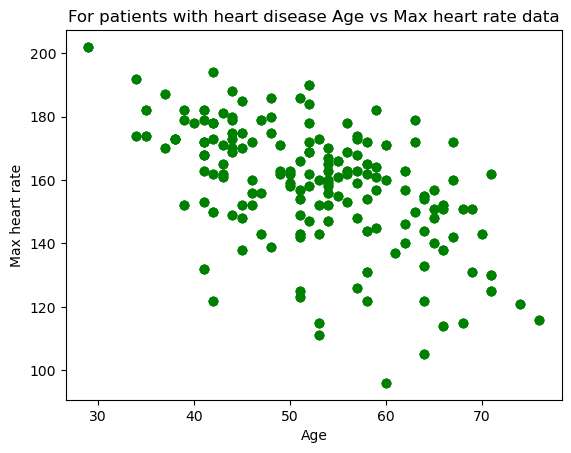

In [12]:
#Age vs Max heart rate
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],color="green")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.title("For patients with heart disease Age vs Max heart rate data")

Text(0.5, 1.0, 'For patients without heart disease Age vs Max heart rate data')

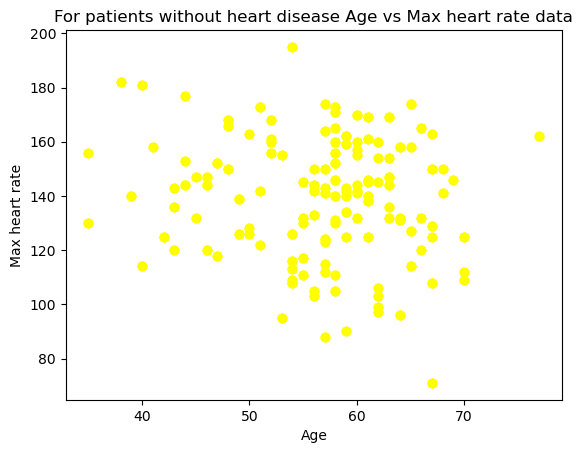

In [13]:
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],color="yellow")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.title("For patients without heart disease Age vs Max heart rate data")

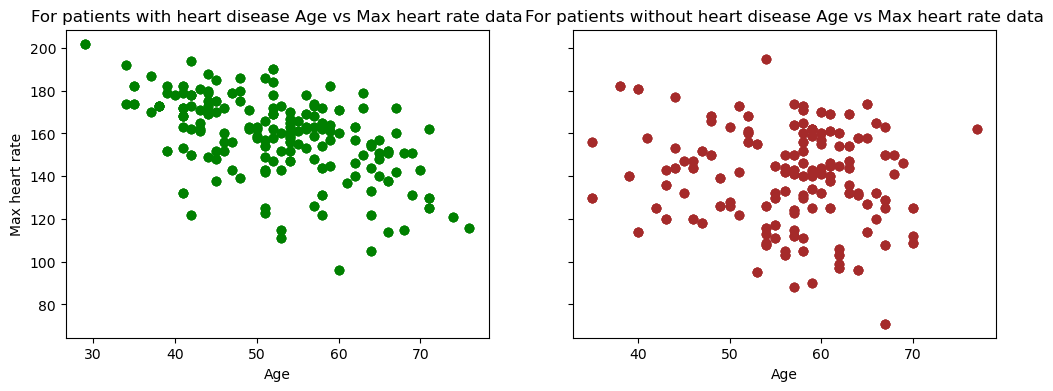

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4),sharey=True)
ax1.scatter(df.age[df.target==1],df.thalach[df.target==1],color="green")
ax1.set(xlabel="Age",
        ylabel="Max heart rate",
        title="For patients with heart disease Age vs Max heart rate data")
ax2.scatter(df.age[df.target==0],df.thalach[df.target==0],color="brown")
ax2.set(xlabel="Age",
        title="For patients without heart disease Age vs Max heart rate data")
plt.show()

<Axes: ylabel='Frequency'>

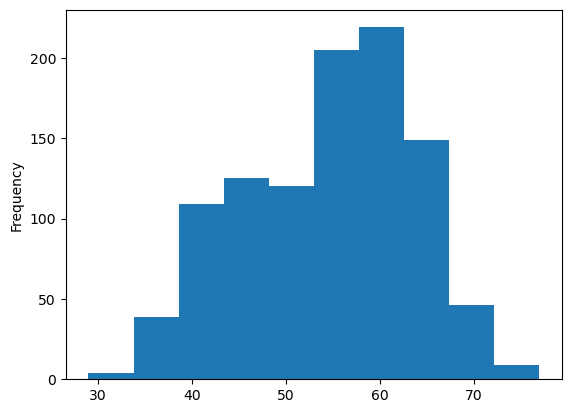

In [15]:
#Heart disease age data
df.age.plot.hist()

In [16]:
#Heart disease frequency for chest pain types
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


In [17]:
df.cp.value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

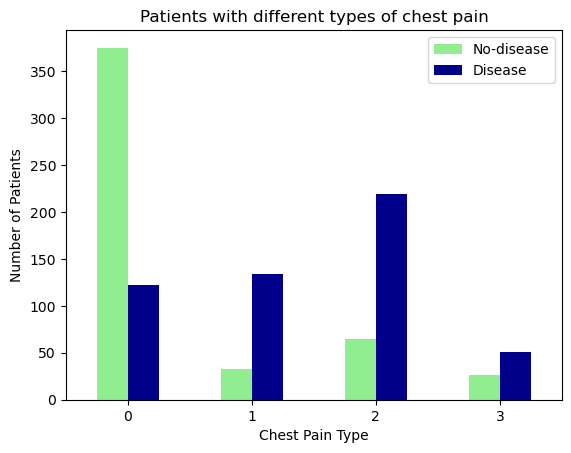

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightgreen","darkblue"]);
plt.xlabel("Chest Pain Type")
plt.ylabel("Number of Patients")
plt.title("Patients with different types of chest pain")
plt.xticks(rotation=0)
plt.legend(["No-disease","Disease"])
plt.show();

In [19]:
#Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


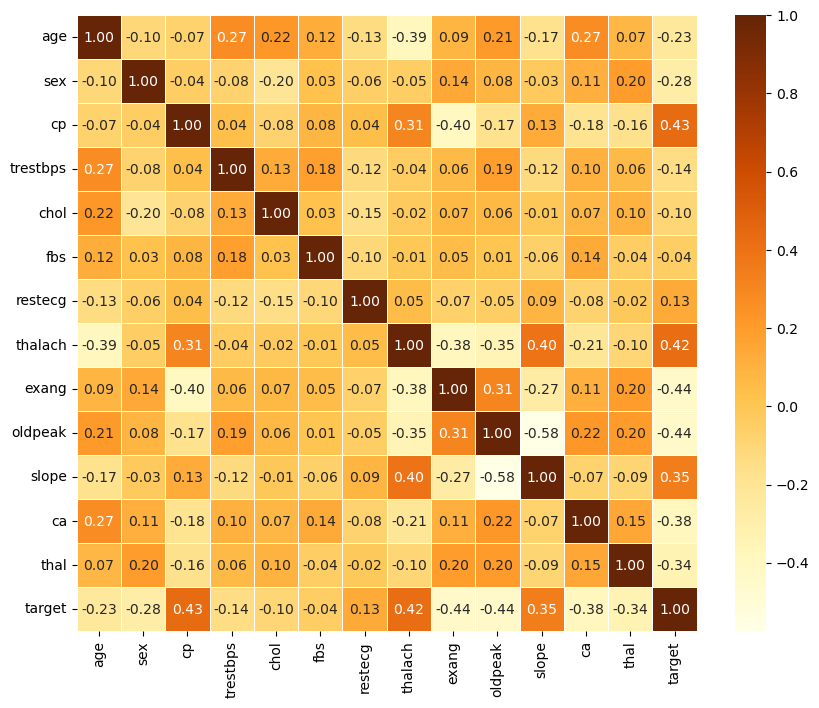

In [20]:
fig,ax=plt.subplots(figsize=(10,8))
corr_matrix=df.corr()
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlOrBr")

<Axes: xlabel='exang'>

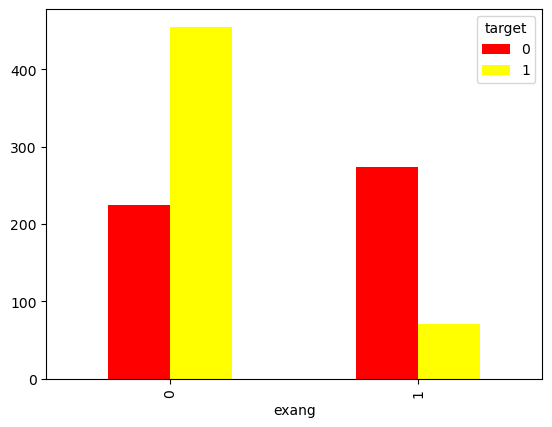

In [21]:
pd.crosstab(df.exang,df.target).plot(kind="bar",color=["red","yellow"])

## 4.Modelling

In [22]:
#Creating x and y and spliting the data into training and test samples
np.random.seed(42)
x=df.drop("target",axis=1)
y=df["target"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

* We'll use RandomForestClassifier, KnearestNeighbors & LogisticRegression to train and test our model

In [23]:
#Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)}
#Create a function
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    Fits and Evaluates given Machine learning model.
    models : A dictionary of different skcikit-learn machine learning models.
    x_train : Training data without labels
    x_test : Test data without labels
    y_train : Training labels
    y_test : Test labels
    '''
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [24]:
model_scores=fit_and_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\hp\Heart_disease_project\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8054474708171206,
 'KNN': 0.7198443579766537,
 'Random Forest': 0.9883268482490273}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

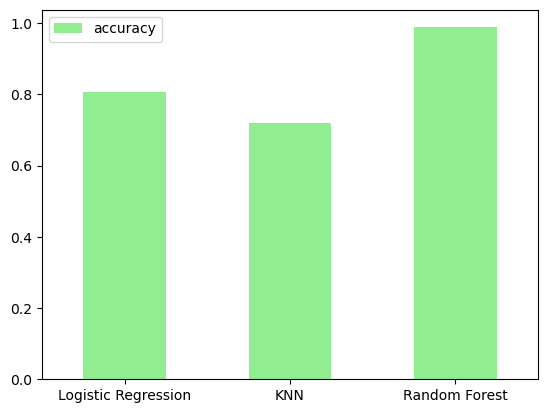

In [25]:
#Model Comparison
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color=['lightgreen'])
plt.xticks(rotation=0)

* Next things to look at:
1. Hyperparameter tuning
2. Cross-validation score
3. Feature Importance
4. Confusion matrix
5. Precision
6. Recall
7. F1 score
8. Classification report
9. ROC curve
10. Area under the curve (AUC)

# Hyperparameter tuning

In [26]:
#Let's tune KNN
train_scores=[]
test_scores=[]
neighbor=range(1,21)
knn=KNeighborsClassifier()
for i in neighbor:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
train_scores

[1.0,
 0.9934895833333334,
 0.984375,
 0.9283854166666666,
 0.8997395833333334,
 0.8125,
 0.7903645833333334,
 0.7890625,
 0.76171875,
 0.7643229166666666,
 0.7669270833333334,
 0.7708333333333334,
 0.7721354166666666,
 0.7799479166666666,
 0.7643229166666666,
 0.76953125,
 0.7604166666666666,
 0.7630208333333334,
 0.7408854166666666,
 0.73828125]

In [27]:
test_scores

[0.9883268482490273,
 0.9494163424124513,
 0.8832684824902723,
 0.7937743190661478,
 0.7198443579766537,
 0.6848249027237354,
 0.6848249027237354,
 0.7042801556420234,
 0.7276264591439688,
 0.7003891050583657,
 0.688715953307393,
 0.6926070038910506,
 0.7003891050583657,
 0.7431906614785992,
 0.7198443579766537,
 0.7120622568093385,
 0.708171206225681,
 0.7315175097276264,
 0.7120622568093385,
 0.7159533073929961]

The max score on the test data is : 98.83%


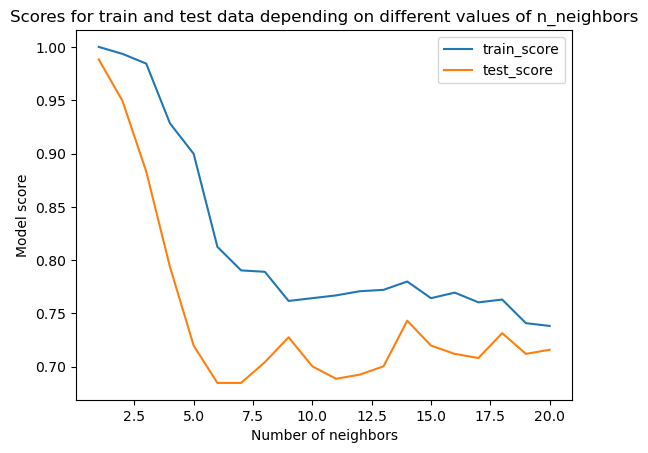

In [28]:
plt.plot(neighbor,train_scores)
plt.plot(neighbor,test_scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.title("Scores for train and test data depending on different values of n_neighbors")
plt.legend(["train_score","test_score"])
print(f"The max score on the test data is : {max(test_scores)*100:.2f}%")

* The random forest classifier has accuracy more than 95% for the following parameters (as seen above):
1. max_depth=10
2. n_estimators=50
3. random_state=42
* The KNN has an accuracy of 98.83% (above 95%) for the n_neighbors value of 1 and accuracy of 94.94% ~ 95% for the n_neighbors value of 2.

* We now need to imporve the LogisticRegression model to bring its accuracy above  95%. Current accuracy: 80.54%

In [29]:
#Using RandomizedSeaerchCV
 #Create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}
 #Create a hyperparameter grid for random forest regressor
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)}

In [30]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=25,
                              verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=25,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 9.236708571873866}

In [32]:
rs_log_reg.score(x_test,y_test)

0.7937743190661478

In [33]:
np.random.seed(42)
rf_log_reg=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
rf_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [34]:
rf_log_reg.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
rf_log_reg.score(x_test,y_test)

0.9221789883268483

In [36]:
#Using GridSeaerchCV
 #Different parameters grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,50),
              "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.685113...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [37]:
gs_log_reg.best_params_

{'C': 7.9060432109076855, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(x_test,y_test)

0.7937743190661478

#Evaluating the machine learning model:

 * Next steps:
 1. ROC curve and AUC
 2. Confusion Matrix
 3. Classification Report
 4. Precision
 5. Recall
 6. F1 score
> Use cross validation wherever applicable. 

In [40]:
y_preds=gs_log_reg.predict(x_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

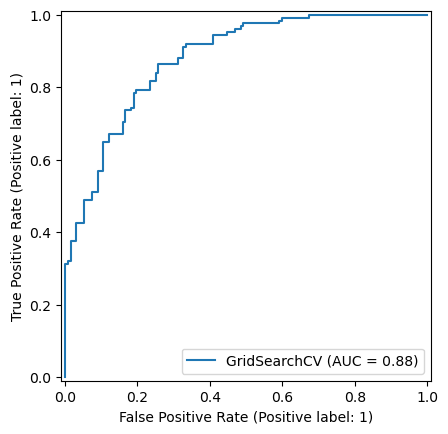

In [44]:
#Plot ROC curve and calculate AUC
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

In [47]:
#Confusion Matrix
confusion_matrix(y_test,y_preds)

array([[ 96,  36],
       [ 17, 108]], dtype=int64)

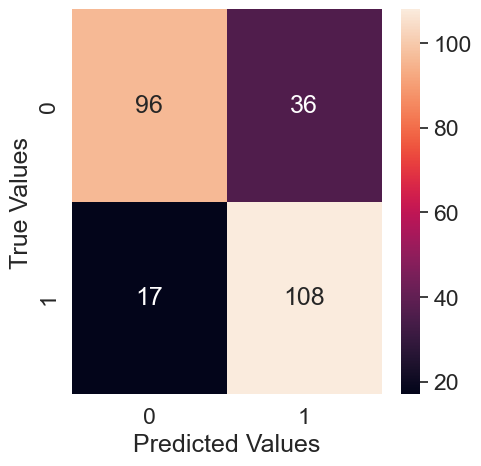

In [55]:
#Using Seaborn
sns.set(font_scale=1.5)
def plot_confusion_matrix(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar="Blues",
                   fmt=".0f")
    plt.xlabel("Predicted Values")
    plt.ylabel("True Values")
plot_confusion_matrix(y_test,y_preds)

In [56]:
#Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.85      0.73      0.78       132
           1       0.75      0.86      0.80       125

    accuracy                           0.79       257
   macro avg       0.80      0.80      0.79       257
weighted avg       0.80      0.79      0.79       257



In [59]:
##Calcuation using Cross-Validation of precision, recall, f1-score and accuracy
clf=LogisticRegression(C= 7.9060432109076855,
                       solver= 'liblinear')

In [61]:
#Cross-Validated Accuracy
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc,np.mean(cv_acc)

(array([0.88780488, 0.86341463, 0.86829268, 0.82439024, 0.80487805]),
 0.8497560975609757)

In [62]:
#Cross-Validated Precision
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision,np.mean(cv_precision)

(array([0.85964912, 0.85321101, 0.8362069 , 0.79487179, 0.78947368]),
 0.8266825015230749)

In [63]:
#Cross-Validated Recall
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall,np.mean(cv_recall)

(array([0.93333333, 0.88571429, 0.92380952, 0.88571429, 0.8490566 ]),
 0.8955256064690026)

In [64]:
#Cross-Validated F1-Score
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1,np.mean(cv_f1)

(array([0.89497717, 0.86915888, 0.87782805, 0.83783784, 0.81818182]),
 0.8595967515545485)

In [67]:
print(f"Accuracy : {np.mean(cv_acc):.2f} , Precision : {np.mean(cv_precision):.2f} , Recall : {np.mean(cv_recall):.2f} , F1-Score : {np.mean(cv_f1):.2f}")

Accuracy : 0.85 , Precision : 0.83 , Recall : 0.90 , F1-Score : 0.86


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1-Score')])

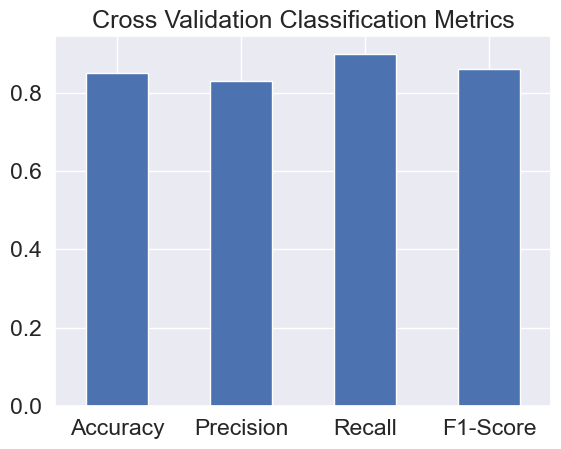

In [75]:
cv_metrics=pd.DataFrame({"Accuracy" : 0.85,
                         "Precision" : 0.83,
                         "Recall" : 0.90,
                         "F1-Score" : 0.86},index=[0])
cv_metrics.T.plot.bar(title="Cross Validation Classification Metrics",legend=False)
plt.xticks(rotation=0)

## Feature Importance
> Which features contributed the most and how?

In [76]:
#Fit an instance of LogisticRegression
clf=LogisticRegression(C= 7.9060432109076855,
                       solver= 'liblinear')
clf.fit(x_train,y_train)

LogisticRegression(C=7.9060432109076855, solver='liblinear')

In [78]:
#Check coefficient
clf.coef_

array([[ 0.00395364, -1.92951302,  0.85701396, -0.01567271, -0.01150764,
        -0.20828393,  0.20169041,  0.03138675, -0.7737028 , -0.70525664,
         0.5760904 , -0.79440492, -1.03738744]])

In [79]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003953639130308032,
 'sex': -1.9295130182118205,
 'cp': 0.8570139578047368,
 'trestbps': -0.015672714647383637,
 'chol': -0.011507641017620855,
 'fbs': -0.20828393209238755,
 'restecg': 0.20169040571157548,
 'thalach': 0.03138675388487634,
 'exang': -0.7737027959759274,
 'oldpeak': -0.705256639616918,
 'slope': 0.5760903977720269,
 'ca': -0.7944049152206637,
 'thal': -1.0373874377338848}

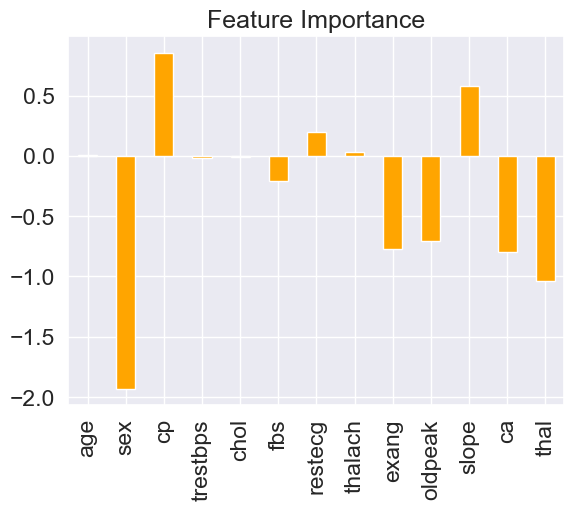

In [86]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False,color="orange");

# Inference

1. RandomForestClassifier has the highest accuracy.
2. After numerous experimentation and hyperparameter tuning we get the above graph for the feature dependencies
3. Sex has the highest negative correlation, cp has highest positive correlation where as features like cholestrol, trestbps, age and thalach have next
   to zero effect on the target.
4. To further impove the model, we can either collect more data, try out a different model , drop some feature which have no effect putting more emphasis
   on the ones that do or carry out more extensive hyperparameter tuning.